

# Implementação e Análise de Algoritmos de Implementação

### Integrantes: 
João Canavarro

Renan Cunha

Ronaldd Pinho

Wagner Felidré

In [7]:
import sys
import random
import time
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
import timeit
sys.path.append("algoritmos/")

## Questão 1

In [8]:
print('e ai')

e ai


## Questão 2 - Implemente em uma linguagem de programação a sua escolha o algoritmo de ordenação HeapSort. Em seguida, trabalhe os itens abaixo.

In [9]:
def quick_sort(ARRAY):
    ARRAY_LENGTH = len(ARRAY)
    if( ARRAY_LENGTH <= 1):
        return ARRAY
    else:
        PIVOT = ARRAY[(ARRAY_LENGTH//2)-1]    #pivô no meio.
        GREATER = [ element for element in ARRAY[1:] if element > PIVOT ]
        LESSER = [ element for element in ARRAY[1:] if element <= PIVOT ]
        return quick_sort(LESSER) + [PIVOT] + quick_sort(GREATER)

In [60]:
def quick_sort_modificado(ARRAY):
    ARRAY_LENGTH = len(ARRAY)
    if( ARRAY_LENGTH <= 1):
        return ARRAY
    else:
        PIVOT = ARRAY[random.randint(0,ARRAY_LENGTH-1)]  #pivô é um elemento aleatório
        GREATER = [ element for element in ARRAY[1:] if element > PIVOT ]
        LESSER = [ element for element in ARRAY[1:] if element <= PIVOT ]
        return quick_sort(LESSER) + [PIVOT] + quick_sort(GREATER)

## a)Sequência aleatória de números entre 1 e 100. 

In [61]:
print("100 Elementos -> Pivô no meio.\n")

x = [random.randint(1,100) for l in range (100)]

print("Lista x Desornada:",x)
print("Lista x Ordenada:",quick_sort(x))


100 Elementos -> Pivô no meio.

Lista x Desornada: [24, 20, 6, 40, 74, 74, 8, 90, 84, 21, 88, 56, 42, 81, 98, 69, 50, 6, 13, 38, 37, 16, 21, 66, 75, 35, 86, 1, 5, 88, 74, 27, 59, 19, 15, 80, 2, 81, 19, 62, 8, 9, 99, 10, 69, 54, 82, 33, 51, 95, 85, 12, 100, 96, 54, 74, 57, 62, 96, 10, 37, 18, 3, 69, 60, 18, 37, 10, 89, 94, 18, 49, 86, 53, 32, 28, 89, 81, 64, 19, 100, 73, 32, 61, 31, 84, 60, 22, 30, 14, 63, 85, 85, 63, 95, 98, 14, 71, 64, 57]
Lista x Ordenada: [2, 3, 5, 5, 5, 6, 8, 9, 9, 10, 10, 12, 12, 12, 14, 14, 18, 18, 18, 18, 18, 18, 19, 19, 22, 30, 31, 31, 32, 32, 32, 33, 37, 37, 37, 37, 37, 37, 37, 38, 49, 51, 51, 51, 51, 53, 54, 54, 54, 57, 60, 60, 60, 61, 62, 62, 62, 62, 63, 63, 63, 64, 64, 69, 69, 69, 71, 73, 74, 74, 74, 75, 80, 80, 81, 81, 82, 82, 84, 84, 85, 85, 86, 86, 89, 89, 89, 89, 89, 94, 95, 95, 95, 96, 96, 96, 98, 100, 100, 100]


## b)Qual a complexidade no tempo do algoritmo?

<font size = 4>
<br>
Sua complexidade no melhor caso é Ô(nlog2(n)) e no pior caso é Ô(n²). Escolhemos o pivô aleatoriamente para obter bom desempenho no caso médio sobre todas as entradas.

</font>

## c)Comparar -> Sequencia Aleatória x Ordenada (Cresc/Decre).

->Pivô no meio.

Média Desordenado 1 000 - 20 000 elem.: 1.11980310676
Média Crescente 1 000 - 20 000 elem.: 0.7736880974
Média Decrescente 1 000 - 20 000 elem.: 0.832242755344


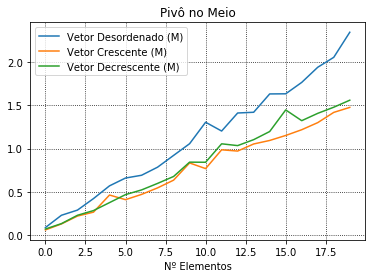

In [62]:
print("->Pivô no meio.\n")
tx = []
tcresc = []
tdecre = []
i = 1000

while (i <= 20000):
    x = [random.randint(1,i)for l in range (i)]
    cresc = [l for l in range (i)]
    decre = [l for l in range(i-1, -1, -1)]

    #Desordenado
    tx.append(timeit.timeit(lambda:quick_sort(x),number = 40))
    #Crescente
    tcresc.append(timeit.timeit(lambda:quick_sort(cresc),number = 40))
    #Decrescente
    tdecre.append(timeit.timeit(lambda:quick_sort(decre),number = 40))
    i+=1000

print("Média Desordenado 1 000 - 20 000 elem.:",np.mean(tx))
print("Média Crescente 1 000 - 20 000 elem.:",np.mean(tcresc))
print("Média Decrescente 1 000 - 20 000 elem.:",np.mean(tdecre))

num_elementos = np.arange(len(tx))

plt.plot(num_elementos,tx,label = 'Vetor Desordenado (M)')
plt.plot(num_elementos,tcresc,label = 'Vetor Crescente (M)')
plt.plot(num_elementos,tdecre,label = 'Vetor Decrescente (M)')

plt.legend()
plt.title("Pivô no Meio")
plt.xlabel("Nº Elementos")
plt.grid(linestyle = ':', color = 'k')
plt.show()

## d)Algoritmo modificado: Pivô aleatório.


--------------------------
100 Elementos -> Pivô aleatório.

Lista x Desornada: [50, 81, 24, 15, 44, 97, 72, 39, 58, 38, 27, 89, 28, 67, 9, 69, 40, 81, 43, 46, 100, 54, 39, 71, 37, 78, 1, 11, 63, 76, 91, 16, 15, 50, 10, 42, 14, 60, 24, 29, 55, 17, 45, 36, 11, 66, 19, 81, 97, 9, 16, 3, 52, 51, 61, 36, 55, 20, 71, 74, 94, 46, 83, 89, 24, 55, 65, 38, 66, 24, 76, 30, 71, 74, 15, 51, 89, 43, 63, 26, 24, 46, 79, 71, 91, 71, 34, 30, 12, 96, 88, 14, 51, 96, 13, 33, 79, 9, 18, 68]
Lista x Ordenada: [3, 9, 9, 9, 10, 10, 11, 11, 11, 12, 12, 13, 14, 15, 16, 16, 17, 18, 19, 19, 19, 20, 20, 24, 24, 24, 24, 26, 30, 30, 30, 33, 34, 36, 36, 36, 37, 37, 38, 42, 42, 43, 46, 46, 46, 46, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 55, 55, 55, 55, 60, 61, 61, 63, 63, 65, 65, 66, 66, 66, 68, 71, 71, 71, 71, 71, 72, 74, 74, 74, 76, 76, 79, 79, 81, 81, 83, 83, 88, 89, 89, 89, 91, 94, 94, 94, 96, 96, 97, 97]

--------------------------

->Pivô aleatório.

Média Desordenado 1 000 - 20 000 elem.: 1.10925146763
Média

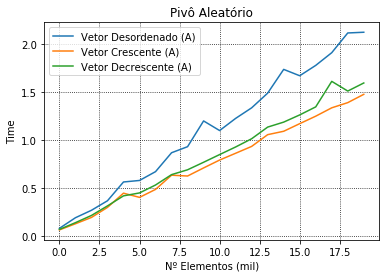

In [63]:
print("\n--------------------------")
print("100 Elementos -> Pivô aleatório.\n")

x = [random.randint(1,100) for l in range (100)]

print("Lista x Desornada:",x)
print("Lista x Ordenada:",quick_sort_modificado(x))

print("\n--------------------------\n")

print("->Pivô aleatório.\n")

tx_mod = []
tcresc_mod = []
tdecre_mod = []

i = 1000
while (i <= 20000):
  x_mod = [random.randint(1,i) for l in range (i)]
  cresc_mod = [l for l in range (i)]
  decre_mod = [l for l in range(i, 0, -1)]

  #Desordenado Modificado
  tx_mod.append(timeit.timeit(lambda:quick_sort_modificado(x_mod),number = 40))
  #"Crescente Modificado
  tcresc_mod.append(timeit.timeit(lambda:quick_sort_modificado(cresc_mod),number = 40))
  #Decrescente Modificado
  tdecre_mod.append(timeit.timeit(lambda:quick_sort_modificado(decre_mod),number = 40))
  i+=1000

print("Média Desordenado 1 000 - 20 000 elem.:",np.mean(tx_mod))
print("Média Crescente 1 000 - 20 000 elem.:",np.mean(tcresc_mod))
print("Média Decrescente 1 000 - 20 000 elem.:",np.mean(tdecre_mod))

plt.plot(num_elementos,tx_mod,label = 'Vetor Desordenado (A)')
plt.plot(num_elementos,tcresc_mod,label = 'Vetor Crescente (A)')
plt.plot(num_elementos,tdecre_mod,label = 'Vetor Decrescente (A)')
plt.legend()
plt.title("Pivô Aleatório")
plt.ylabel("Time")
plt.xlabel("Nº Elementos (mil)")
plt.grid(linestyle = ':', color = 'k')

plt.show()

## e)Pivô no meio x Pivô aletório (nas duas situações).

<font size = 4>
<br>
 A escolha do pivô é crucial para o bom desempenho do método, já que a fase de
partição é a parte crítica do algoritmo. Intuitivamente o pivô no meio pode parecer
uma boa escolha, mas em alguns casos não funciona bem, levando a o algoritmo a 
complexidade quadrática. Desse modo, quando não sabemos como os elementos estão arranjados,
podemos adicionar um fator de aleatoriedade na escolha do pivô. Analisando os resultados dos
dois algoritmos, principalmente nos de 20 000 execuções, percebemos uma diferença consideravel
entre o a ordenação de vetores com valores aleatoriamente distribuidos, e os vetores ordenados
crescentes e decrescentes.

## A) Use uma sequência aleatória de números inteiros entre 1 e 100 como entrada do algoritmo e apresente o print da execução.

In [10]:
tamanho = random.randint(1, 100)
unsorted = np.random.randint(tamanho, size = tamanho)  #Generate 100 elements
print('vetor não ordenado\n', unsorted)
print('vetor ordenado \n', heap_sort(unsorted))

vetor não ordenado
 [43 22 11 69 34 19 57 18 54 82 51 16 80 44 29 52  0 56 80 78 14  2 17 81
 33 82 48 17 56 63 63 75 43 70 74 70 71 59 73 48 76 66 28 81 53 18 62 24
 35 15 59 65 16  7 34 24 44 17 31 16 24 82 24 44 35 57 62 14 74 15 37 76
 81  3  2 18 10 36 45  4 43 53 77 24]
vetor ordenado 
 [ 0  2  2  3  4  7 10 11 14 14 15 15 16 16 16 17 17 17 18 18 18 19 22 24
 24 24 24 24 28 29 31 33 34 34 35 35 36 37 43 43 43 44 44 44 45 48 48 51
 52 53 53 54 56 56 57 57 59 59 62 62 63 63 65 66 69 70 70 71 73 74 74 75
 76 76 77 78 80 80 81 81 81 82 82 82]


## B) Qual é a complexidade no tempo do algoritmo? Explique.

<font size = 4> O algoritmo heapSprt tem por sua complexidade no melhor caso n*log(n) e para o pior caso n*log(n), porém deve constar que a quantidade de trocas realizadas influenciam na eficiência do algoritmo, sendo assim um vetor em decrescente possuiria um desempenho relacionado a tempo relativamento melhor que um vetor em ordem crescenta, sendo estes dados como entrada para a ordenação.</font>

## C) 
### c1) Compare o tempo de execução do algoritmo quando o mesmo recebe como entrada sequências ordenadas (em ordem crescente e decrescente) e desordenadas. 
### c2) Caso mais números fossem inseridos nas sequências, como o desempenho do algoritmo seria afetado? Usando dados reais, ilustre graficamente suas conclusões.

In [12]:
def ordenacoes(sett):
    tempo_crescente   = []
    tempo_decrescente = []
    tempo_desordenado = []
    
    parcial_crescente   = []
    parcial_decrescente = []
    parcial_desordenado = []
    
    if(sett == 0):
        tamanho = np.arange(0,100001, 10000)[1::]
        print('Valores do vetor: ', tamanho)
    else:
        tamanho = np.arange(0,101, 10)[1::]
        print('Valores do vetor: ', tamanho)
     
    for i in range(0,10):
        for j in range(0,5):
            unsorted = np.random.randint(tamanho[i], size = tamanho[i])  #Generate elements
            vetor = heap_sort(unsorted) # Ordenacao
            
            # Vetor ordenado 
            inicio = time.time()
            crescente = heap_sort(vetor)
            fim = time.time()
            t1 = fim - inicio
            parcial_crescente.append(t1)

            # Vetor Decrecente
            inicio = time.time()
            decrescente = heap_sort(vetor[::-1])
            fim = time.time()
            t2 = fim - inicio
            parcial_decrescente.append(t2)

            #Vetor Desordenado
            inicio = time.time()
            desordenado = heap_sort(unsorted)
            fim = time.time()
            t3 = fim - inicio
            parcial_desordenado.append(t3)
            
        tempo_crescente.append(np.average(parcial_crescente))
        tempo_decrescente.append(np.average(parcial_decrescente))
        tempo_desordenado.append(np.average(parcial_desordenado))
        
    return tamanho, tempo_crescente, tempo_decrescente, tempo_desordenado

In [13]:
def plotagem_tempo(sett, tamanho,tempo_crescente, tempo_decrescente, tempo_desordenado):
    plt.plot(tamanho, tempo_crescente,   'r--', label='Vetor Crescente')
    plt.plot(tamanho, tempo_decrescente, 'g-.', label='Vetor Decrescente', linewidth=2)
    plt.plot(tamanho, tempo_desordenado, 'b--', label='Vetor Desordenado')
    plt.legend()
    
    if(sett == 0):
        plt.title("Tamanho fixo de elementos")
    else:
        plt.title('Tamanho variado de elementos')
        
    plt.grid()
    plt.show()

[ 10  20  30  40  50  60  70  80  90 100]


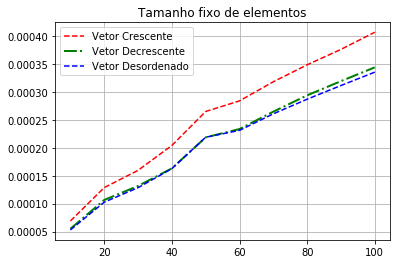

[ 10000  20000  30000  40000  50000  60000  70000  80000  90000 100000]


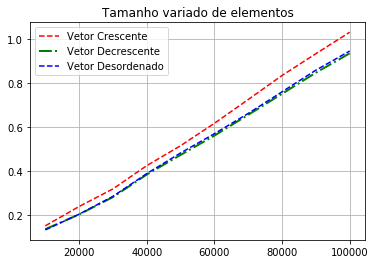

In [14]:
tamanho, tempo_crescente, tempo_decrescente, tempo_desordenado = ordenacoes(1)
plotagem_tempo(0, tamanho, tempo_crescente, tempo_decrescente, tempo_desordenado)

tamanho, tempo_crescente, tempo_decrescente, tempo_desordenado = ordenacoes(0)
plotagem_tempo(1, tamanho, tempo_crescente, tempo_decrescente, tempo_desordenado)

<font size = 4>
    A ordenção ocorrei para o caso (C1) com valores de 1 a 100, para o caso (C2) ocorre com valores de 1 a 100.000, conforme fica evidenciado acima.
</font>

<br>
<font size = 4>
C1)
    Sendo assim para um vetor em ordem crescente possui mais etapas de trocas realizadas desta forma possui um tempo mais elevado que os vetor aleatórios ou decrescentes, os vetores descrescentes e aleatórios possuem tempo relativamento próximo, visto que um vetor decrescente precisa fazer menos iterações de troca e o vetor aleatório dependendo da situação dos elementos do vetor pode-se obter quase a mesma quatidade de iterações.
</font>

<br>
<font size = 4>
C2) 
    Para o segundo caso, como foi constatado o vetor em ordem crescente à ser ordenado será mais oneroso que vetores decrescente e desordenado, porém para valores pequenos os vetores decrescente e aleatório possuem tempo próximos, porém para valores assintóticos o vetor aleatório possui pior desenpenho, visto que ha possibilidade de fazer menos iterações que o vetor descrescente.
</font>

## D)  Faça um estudo comparativo do algoritmo HeapSort com os algoritmos QuickSort, implementados na Questão 1, nas situações apresentadas.

<font size = 4>

Para o quick sort o pior caso de particionamento ocorre quando o elemento pivô divide a lista de forma desbalanceada, ou seja, divide a lista em duas sub listas: uma com tamanho 0 e outra com tamanho n - 1, sendo assim possuindo complexidade (n²), contrapartida o heap sort não é influenciado em complexidade com o tipo de entradada do vetor, este possui complexidade de nlog(n) para o pior caso.
</font>

<br>
<br>

<font size = 4>
O melhor caso de particionamento do quick sort acontece quando ele produz duas listas de tamanho não maior que n/2, assim possuindo complexidade nlog(n), o heap sort no seu melhor caso também possui complexidade nlog(n), pois o vetor de entrada não imfluência sua complexidade. 

</font>

## Questão 3 - Implemente em uma linguagem de programação a sua escolha os algoritmos de ordenação linear CountingSort e BucketSort. Em seguida, trabalhe os itens abaixo.



In [ ]:
from counting_sort import counting_sort
from bucket_sort import bucket_sort

In [ ]:
def test_arrays(sort_algorithm, begin=10000, end=110000, increment=10000, iterations=1, 
                constant_high=False, constant_size=False, uniform_dist=True):
    
    steps = (end-begin)//increment
    times = np.zeros((iterations, steps))
    
    for e in range(steps):
        for j in range(iterations):
            high = begin if constant_high else e*increment+begin
            size = begin if constant_size else e*increment+begin
            
            if uniform_dist:
                vetor = np.random.randint(low=0, high = high, size = size)
            else:
                vetor = np.random.pareto(e*increment+begin, e*increment+begin)
            
            times[j,e] = sort_algorithm(vetor)[1]
    x = list(range(begin, end, increment))
    return x, np.median(times, axis=0)

def plot_graph(y, label_x, label_y, title="", x=None, hist=False):
    if hist:
        plt.hist(y, bins=y.shape[0]//100)
    else:
        plt.plot(x,y)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(title)
    plt.show

### a. Analise o comportamento do tempo de execução do algoritmo CountingSort quando o número de elementos da sequência de entrada é aumentado gradativamente. Durante a análise, comente a relação que existe entre o tamanho da sequência de entrada e o elemento de maior valor nessa sequência. Usando dados reais, ilustre graficamente suas conclusões.


In [ ]:
x, time =  test_arrays(counting_sort, iterations=8, constant_high=True)
plot_graph(x=x,y=time,title='Counting Sort (Valor Máximo Constante)', 
           label_x="Tamanho do Vetor de Entrada", label_y="Tempo de Execução em Segundos")

###### O tempo de execução do Counting Sort cresce linearmente de acordo com o tamanho do vetor de entrada

In [ ]:
x, time = test_arrays(counting_sort, iterations=8, constant_size=True)
plot_graph(x=x, y=time, title='Counting Sort (Tamanho do Vetor de Entrada Constante)', 
           label_x="Valor Máximo do Vetor de Entrada", label_y="Tempo de Execução em Segundos")

###### O tempo de execução do Counting Sort cresce linearmente de acordo com o valor máximo do vetor

In [ ]:
X = np.resize(np.linspace(10**4, 10**5,10,dtype=int), (10,10))
Y = X.transpose(1,0)
Z = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        vetor = np.random.randint(low=0, high = Y[i,j]*4, size = X[i,j])
        Z[i,j] = counting_sort(vetor)[1]
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
ax.set_xlabel("Tamanho do Vetor")
ax.set_ylabel("Maior Valor do Vetor")
ax.set_zlabel("Tempo(s)")
plt.show()

###### A partir dos gráficos, é possível confirmar a complexidade temporal do Counting Sort de O(n+k), sendo 'n' o tamanho do vetor de entrada e 'k' o valor máximo do vetor. O tempo de execução do algoritmo aumenta linearmente de acordo tanto com o tamanho do vetor como com o valor máximo do vetor.

### b. Compare o tempo de execução do algoritmo BucketSort quando o mesmo recebe como entrada sequências uniformemente distribuídas. Caso mais números fossem inseridos nas sequências, como o desempenho do algoritmo seria afetado? Usando dados reais, ilustre graficamente suas conclusões.

In [ ]:
numbers = np.random.uniform(0,10**4,10**4)
plot_graph(numbers, hist=True, title="Distribuição Uniforme", 
              label_x="Valor", label_y="Quantidade")

In [ ]:
x,time =  test_arrays(bucket_sort, iterations=3)
plot_graph(time,x=x, title="Bucket Sort", label_x="Tamanho do Vetor de Entrada", 
           label_y="Tempo de Execução em Segundos")

######  A complexidade no tempo do algoritmo Bucket Sort é linear, então o tempo de execução vai aumentar proporcionalmente conforme o  o tamanho do vetor de entrada para uma entrada 

In [ ]:
numbers = abs(np.random.normal(scale=100, size=10**4).astype(int))
plot_graph(numbers, hist=True, label_x="Valor", label_y="Quantidade", 
           title="Distribuição Não Uniforme")

In [ ]:
x, time_pareto = test_arrays(bucket_sort, end=60000, iterations=1, uniform_dist=False)
plt.plot(x,time[:5], label="Distribuição Uniforme")
plt.plot(x,time_pareto, label="Distribuição Não Uniforme")
plt.xlabel("Tamanho do Vetor de Entrada")
plt.ylabel("Tempo de Execução em Segundos")
plt.title("Bucket Sort")
plt.legend()
plt.show()

###### Através dos gŕaficos, podemos perceber que o algoritmo Bucket Sort é muito mais eficiente para vetores de entrada que possuem seus valores distribuidos de forma uniforme. 

<font size=4>
    Compare o tempo de execução dos algoritmos CountingSort e QuickSort em situações reais de uso. Explique qual algoritmo é mais eficiente e por que.
</font>

In [ ]:
import numpy as np, numpy.random as npr
import matplotlib.pyplot as plt
import time
from quick_sort import quick_sort as quick
from counting_sort import counting_sort as count

In [4]:
# Roda e retorna o tempo do algoritmo de ordenação
# Parâmetros: Array, NomeDoAlgoritmo

def sorting_time(A, sorter):
    if sorter == 'quick':
        start = time.time()
        A1 = np.array(quick(A))
        end = time.time()
    elif sorter == 'count':
        start = time.time()
        A1 = np.array(count(A))
        end = time.time()
        
    return round( (end-start), 4)

In [5]:
# Em 5 iterações: cria 1 array em cada iteração e ordena com os dois algoritmos
# e guarda os 5 tempos de execução de cada algoritmo e retorna as suas médias

def media_5exec(SIZE, RANGE):
    quick_times = np.zeros(5)
    count_times = np.zeros(5)
    for i in range(5):
        # cria array aleatorio
        ARRAY = npr.randint(RANGE, size=SIZE)
        quick_times[i] = sorting_time(ARRAY, 'quick')
        count_times[i] = sorting_time(ARRAY, 'count')
        
    return round(np.average(quick_times), 4), round(np.average(count_times), 4)

In [6]:
# plotar gráficos para vetores com tamanhos especificados em um array

def plotToInputLens(LENGTHS, RANGE):
    print("Números de 0 a", RANGE, "\n")
    quick_times = np.array([], dtype=float)
    count_times = np.array([], dtype=float)

    for i in range(len(LENGTHS)):
        medQuick, medCount = media_5exec(LENGTHS[i], RANGE)
        quick_times = np.append(quick_times, medQuick)
        count_times = np.append(count_times, medCount)

    # plotando os graficos
    plt.plot(LENGTHS, quick_times, "r-", label='Quick Sort')
    plt.plot(LENGTHS, count_times, "b-", label='Counting Sort')
    plt.xlim([ LENGTHS[0] , LENGTHS[-1] ])
    plt.xlabel('Tamanho da entrada')
    plt.ylabel('Tempo em segundos')
    plt.grid()

### Plotando tempos para vetores de 1K a 10K elementos.
    1 - Com valores contidos no intervalo de 0 a 100.
    2 - Com valores contidos no intervalo de 0 a 1000.

Plotando gráficos para os seguintes tamanhos:
 [ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000] 

Números de 0 a 100 



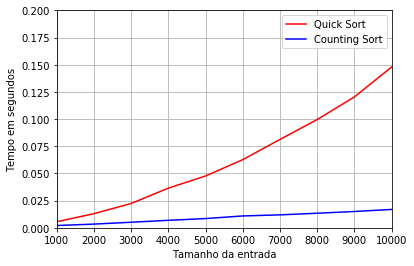

Números de 0 a 1000 



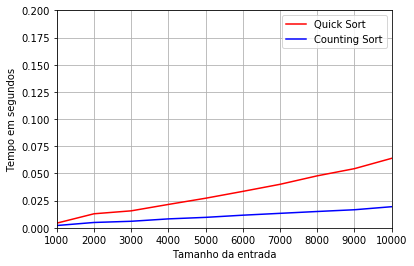

In [7]:
# tamVetor é um vetor com os valores que serão usados como tamanho da entrada
# tamVetor = np.array([500, 600, 700, 800, 900, 1000, 1500])

tamanhos = np.arange(0, 10000 +1, 1000)[1::]

print("Plotando gráficos para os seguintes tamanhos:\n", tamanhos, "\n")

plotToInputLens(tamanhos, RANGE=100)
plt.ylim([0,.2])
plt.legend()
plt.show()

plotToInputLens(tamanhos, RANGE=1000)
plt.ylim([0,.2])
plt.legend()
plt.show()

<font size=4>
    <i>OBS: Conforme aumentamos o Range, ou seja, o intervalo onde os elementos do vetor estão contidos, percebemos uma aproximação do gráfico do Quick Sort em relação ao do Counting Sort.</i>
</font>

### Plotando tempos para vetores de 10K a 100K elementos.
    1 - Com valores contidos no intervalo de 0 a 100.
    2 - Com valores contidos no intervalo de 0 a 1000.
    3 - Com valores contidos no intervalo de 0 a 10000.

Plotando gráficos para os seguintes tamanhos:
 [ 10000  20000  30000  40000  50000  60000  70000  80000  90000 100000] 

Números de 0 a 100 



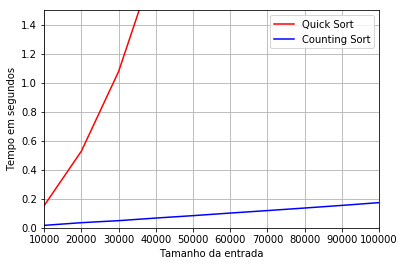

Números de 0 a 1000 



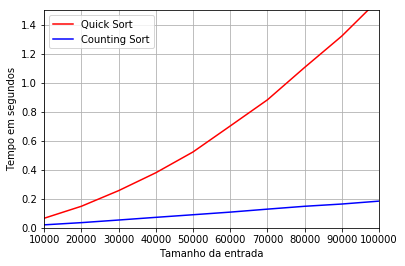

Números de 0 a 10000 



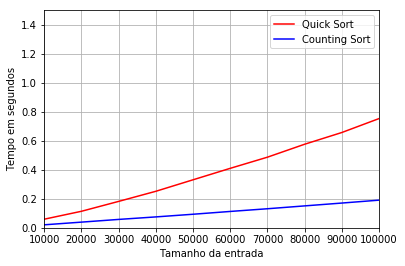

In [8]:
tamanhos = np.arange(0, 100000+1, 10000)[1::]

print("Plotando gráficos para os seguintes tamanhos:\n", tamanhos, "\n")

plotToInputLens(tamanhos, 100) # range = CEM
plt.ylim([0 , 1.5])
plt.legend()
plt.show()

plotToInputLens(tamanhos, 1000) # Range= MIL
plt.ylim([0 , 1.5])
plt.legend()
plt.show()

plotToInputLens(tamanhos, 10000) # Range= DEZ MIL
plt.ylim([0 , 1.5])
plt.legend()
plt.show()

<font size=5>Conclusões</font>

<font size=4>
    Em termos de tempo de execução, o Counting Sort é mais eficiente que o Quick Sort por muitos motivos:<br>
    O mais importante é que o Counting trabalha diretamente com os índices onde os valores devem ser colocados na versão ordenada do vetor, e apesar de as vezes utilizar muita memória auxiliar para isso, ele simplesmente conta os elementos e os posiciona corretamente em um novo vetor.
</font>

<font size=4>
O CountingSort não depende exclusivamente do tamanho (n) do vetor de entrada, o intervalo (k) de valores que os elementos podem assumir também influencia no desempenho do Counting pois o mesmo cria um vetor auxiliar com o tamanho desse intervalo e preenche o mesmo afim de contar quantos elementos de cada valor desse intervalo existem dentro do vetor, e em seguida percorre novamente o mesmo vetor fazendo operações de soma. Portanto, o tamanho 'k' desse intervalo pode ter um peso significativo principalmente para valores assintóticos de k e n.
</font>

<font size=4>
    Percebemos nos gráficos, que o intervalo de valores também tem uma influência no desempenho do QuickSort. Isso acontece porque o Quick é um algoritmo de ordenação instável, ou seja, troca a posição relativa de valores idênticos. O seu desempenho aumenta conforme o intervalo é maior porque quanto menor esse intervalo maiores são as chances de aparecerem valores repetidos no vetor, logo, maior será o número de comparações entre valores iguais.
</font>